# 01. 순환 신경망(Recurrent Neural Network, RNN)

- 피드 포워드 신경망(Feed-Forward Neural Network, FFNN): 입력 길이가 고정되어 있어 자연어 처리를 위한 신경망으로는 한계가 있음

- 순환 신경망
   - 다양한 길이의 입력 시퀀스(Sequence) 
처리 가능 

   - 바닐라 RNN, RNN, LSTM, GRU 등등

1. 순환 신경망(Recurrent Neural Network, RNN)

- 피드 포워드 신경망: 활성 함수 값들은 은닉층에서 출력층 방향으로만

- RNN: 은닉층에서 출력층 방향으로, 은닉층 노드의 다음 계산 입력으로

- 셀(cell)
    - 활성 함수롤 통해 은닉층에서 결과를 내보내는 역할
    - 이전의 값을 기억함 -> '메모리 셀' 이라고도 부름 
    - t-1 시점의 값을 t 시점의 입력으로 사용 
    - t+1 시점으로 보내는 값:  '은닉 상태(hidden state) 

- RNN: 입,출력 길이 다르게 설계 가능
    - 일대다(one-to-many): 이미지 캡셔닝
    - 다대일(many-to-one): 감성 분류, 스팸 메일 분류
    - 다대다(many-to-many): 챗봇, 번역기, 개체명 인식, 품사 태깅

-RNN 수식
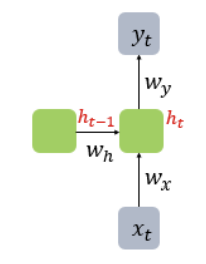

    - t 시점에서의 은닉 상태 값: ℎt
    - 입력층을 위한 가중치: Wx
    -  t-1시점에서의 은닉 상태 값: Wh
    - 은닉층: ℎ𝑡 = 𝑡𝑎𝑛ℎ(𝑊𝑥𝑥𝑡 + 𝑊ℎℎ𝑡−1 + 𝑏)
    - 출력층: 𝑦𝑡 = 𝑓(𝑊𝑦ℎ𝑡 + 𝑏) 단, 𝑓 는 비선형 활성화 함수 중 하나.

    - ht를 계산하는 활성 함수: 하이퍼볼릭탄젠트 함수(tanh)
    - 하나의 층에서의 가중치 값은 동일하게 공유하지만, 각각의 은닉층에서의 가중치 값은 서로 다름 

2. 케라스(Keras)로 RNN 구현하기 

RNN층 추가하기

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(hidden_units))

In [ ]:
# 추가 인자 사용할 때 
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))

# 다른 표기
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N)) 

- RNN층은 3D tensor를 입력으로 받음
- hidden_units: 은닉 상태의 크기, 메모리 셀의 용량, output_dim의 값과도 동일함 
- timesteps(=input_length): 시점의 수 (자연어 처리에서는 보통 문장의 길이) 
- input_dim: 입력의 크기 (자연어 처리에서는 보통 단어 벡터의 차원) 
-batch_size: 한 번에 학습하는 데이터의 개수 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


- 출력값이 (batch_size, output_dim) 크기의 2D tensor일 때, output_dim은 hidden_units의 값인 3
- batch_size 를 알 수 없으므로 (None, 3)

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


- batch_size = 8로 지정한 결과 출력의 크기는 (8, 3) 

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


- return_sequences = True, 출력값: (batch_size, timesteps, output_dim) 크기의 3D tensor 리턴한 결과, 출력 크기: (8, 2, 3) 

3. 파이썬으로 RNN 구현하기 

In [ ]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

inputs = np.random.random((timesteps, input_dim))    # 입력에 해당되는 2D tensor

hidden_state_t = np.zeros((hidden_units,))     # 초기 은닉 상태는 0(벡터)로 초기화

print('초기 은닉 상태 :', hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# (8, 4) 크기의 2D tensor, 입력에 대한 가중치 
Wx = np.random.random((hidden_units, input_dim)) 

# (8, 8) 크기의 2D tensor, 은닉 상태에 대한 가중치 
Wh = np.random.random((hidden_units, hidden_units))

# (8, ) 크기의 1D tensor, 이 값은 편향(bias)
b = np.random.random((hidden_units,))

print('가중치 Wx의 크기(shape) : ', np.shape(Wx))
print('가중치 Wh의 크기(shape) : ', np.shape(Wh))
print('편향의 크기(shape) : ', np.shape(b))

가중치 Wx의 크기(shape) :  (8, 4)
가중치 Wh의 크기(shape) :  (8, 8)
편향의 크기(shape) :  (8,)


In [ ]:
total_hidden_states = []

# 각 시점 별 입력값
for input_t in inputs:
  output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t   # 각 시점의 은닉 상태의 값을 계속해서 누적

total_hidden_states = np.stack(total_hidden_states, axis =0)

print('모든 시점의 은닉 상태: ')
print(total_hidden_states)

모든 시점의 은닉 상태: 
[[0.99996308 0.99996606 0.99999512 0.99985559 0.99999251 0.99999179
  0.9999842  0.99999857]
 [0.99992871 0.99993075 0.99999017 0.99973358 0.99997977 0.99997428
  0.99997622 0.99999815]
 [0.99994238 0.99992623 0.99998642 0.99943376 0.99998342 0.99995696
  0.99995373 0.99999571]
 [0.9999442  0.99994785 0.9999913  0.99974622 0.99998582 0.99997355
  0.99998592 0.99999815]
 [0.99991092 0.99991844 0.99998716 0.99976518 0.99997392 0.99997112
  0.9999675  0.99999809]
 [0.99989955 0.99991254 0.99998832 0.99982519 0.99997036 0.99998064
  0.9999581  0.99999849]
 [0.9998986  0.99991363 0.99998347 0.99972234 0.99996867 0.99994316
  0.99998096 0.99999802]
 [0.99991272 0.99991149 0.9999817  0.99966015 0.99997415 0.99995361
  0.99995318 0.99999685]
 [0.99996156 0.99997002 0.99999595 0.99989379 0.99999235 0.99999216
  0.99999271 0.99999909]
 [0.99993469 0.99993929 0.99999339 0.99976125 0.99998141 0.99997986
  0.99998733 0.99999875]]


4. 깊은 순환 신경망(Deep Recurrent Neural Network) 

- 은닉층 2개 추가 코드 

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))

5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network) 

- 이전과 이후 시점을 모두 고려해서 현재 시점의 예측을 더욱 정확하게 함 
- 하나의 출력값을 예측하기 위해 두 개의 메모리 셀 사용
- 앞 시점의 은닉 상태(Forward States)
- 뒤 시점의 은닉 상태(Backward States) 

In [ ]:
from tensorflow.keras.layers import Bidirectional

timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), 
                        input_shape=(timesteps, input_dim)))

- 은닉층은 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아님
   -> 학습할 수 있는 양이 많아지지만 훈련 데이터 또한 많은 양이 필요함 

6. 점검 퀴즈

- 모델 설명이 다음과 같을 때, 총 파라미터 개수는? 
1. Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5000이고 임베딩 벡터의 차원은 100입니다.
2. 은닉층에서 Simple RNN을 사용하며, 은닉 상태의 크기는 128입니다.
3. 훈련에 사용하는 모든 샘플의 길이는 30으로 가정합니다.
4. 이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용합니다.
5. 은닉층은 1개입니다. 

In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense

vocab_size = 5000
embedding_dim = 100
hidden_size =128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_size))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 529,441
Trainable params: 529,441
Non-trainable params: 0
_________________________________________________________________
